In [2]:
def make_folder_path(folder_type="Training", data_type="Label_Data"):
    '''
    폴더까지의 주소를 리턴해주는 함수
    folder_type = "Training" # or 'Validation'
    data_type = "Origin" # or 'Labeling'
    '''
    folder_path = f"C:/Users/Admin/Desktop/stt_data/{folder_type}/{data_type}/D02/"
    return folder_path

def make_file_path(path=make_folder_path(), file_type="wav", j_folder_num="05",s_folder_no="01", file_no="0001"):
    '''
    파일까지의 주소를 리턴해주는 함수
    folder_no : "01"~"30"
    file_no : 각각 다름
    '''
    sound_file_folder = f"S0000{s_folder_no}"
    file_path = f"{path}/J{j_folder_num}/{sound_file_folder}/{file_no}.{file_type}"

    return file_path

# folder_path = make_folder_path()
# file_path = make_file_path()


### JSON 파일 열어서 하나의 리스트 / 딕셔너리로 만들기 + 정규표현식으로 1차 전처리

In [1]:
# list로 text 통합해서 subcategory : text 로 dictionary 구성하기
import json
import os
import re

def text_to_list(file_num = "01"):
    dialog = []
    root_directory = f'C:/Users/Admin/Desktop/stt_data/json_file/json_{file_num}/'
    root_directory_list = os.listdir(root_directory)
    for i in range(len(root_directory_list)):
        file_path = str(root_directory)+str(root_directory_list[i])
        try:
            target_file = open(file_path, encoding="UTF-8")
            json_file = json.loads(target_file.read())
            speakers = json_file['dataSet']['typeInfo']['speakers']
            for speaker in speakers:
                if '고객' in speaker['type']:
                    category = json_file['dataSet']['typeInfo']['subcategory']
                    for txt in json_file['dataSet']['dialogs']:
                        dialog.append(txt['text'])
        except:
            print(f"error! {file_path}")    
    # 텍스트 데이터 전처리 regex
    text_list = []
    for text in dialog:
        result = re.sub(r'o/ ', r'', text)
        result = re.sub(r'n/', r'', result)
        result = re.sub(r'\(\(\)\)',r'', result)
        result = re.sub(r'/\(([^)]+)\)', r'', result)
        result = re.sub(r'\(', r'', result, count=10)
        result = re.sub(r'\)', r'', result, count=10)
        result = re.sub(r'/', r'', result, count=10).strip()
        text_list.append(result)
    return {category : text_list}

In [2]:
# 다른 파일도 같이 변경 시 dictionary type으로 저장 --> 굳이 그럴 필요가 없는 것 같아서 일단 중지
import json
import re
import os
from collections import defaultdict

dialog_dict = defaultdict(list)
root_directory = 'C:/Users/Admin/Desktop/stt_data/json_file_onlytwo/json_01/'
root_directory_list = os.listdir(root_directory)

txt_list = []
for i in range(len(root_directory_list)):
    file_path = str(root_directory)+str(root_directory_list[i])
    try:
        target_file = open(file_path, encoding="UTF-8") # json file load
        json_file = json.loads(target_file.read())
        speakers = json_file['dataSet']['typeInfo']['speakers']
        category = json_file['dataSet']['typeInfo']['subcategory']
        for speaker in speakers:
            if '고객' in speaker['type']: # 고객이 존재하는 대화만 필터링
                for txt in json_file['dataSet']['dialogs']: # 텍스트 전처리 regex
                    text = txt['text']
                    result = re.sub(r'o/ ', r'', text)
                    result = re.sub(r'n/', r'', result)
                    result = re.sub(r'\(\(\)\)',r'', result)
                    result = re.sub(r'/\(([^)]+)\)', r'', result)
                    result = re.sub(r'\(', r'', result, count=10)
                    result = re.sub(r'\)', r'', result, count=10)
                    result = re.sub(r'/', r'', result, count=10).strip()
                    txt_list.append(result)                
        dialog_dict[f"{category}"] = txt_list     
    except:
        print(f"error! {file_path}")
print(list(dialog_dict.keys()))
dialog_dict

error! C:/Users/Admin/Desktop/stt_data/json_file_onlytwo/json_01/S003657.json
['복지']


defaultdict(list,
            {'복지': ['네, 안녕하세요?',
              '네, 안녕하십니까?',
              '다름이 아니고 저희 아들이 디딤 씨앗 통장을.',
              '해지하려고 하는데요.',
              '죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.',
              '네, 알겠습니다.',
              '고객님 혹시라도 연결 중 전화가 끊긴다면.',
              '예, 담당자 바로 연결해드리겠습니다.',
              '네, 알겠습니다.',
              '네, 좋은 상담 이어 가세요.',
              '고객님께서 디딤 씨앗 통장 해지 관련으로 문의하세요.',
              '네, 연결해 주세요.',
              '네, 수고하세요.',
              '아 저 몇 가지 여쭤볼 게 있어가지고요.',
              '여쭤보려면 어디로 통화를 해야 되나요?',
              '혹시 어떤 불편사항이신가요? 고객님.',
              '이니 아니 불편사항은 아니라 좀 궁금한 거 때문에.',
              '내용이신지 말씀해 주시면 제가 답변해드릴 수 있는 내용은 답변해드리고요. 만약 담당자 연결이 필요하면 연결을 해드리도록 하겠습니다.',
              '아 그래요? 1가지만 좀 궁금한 건데.',
              '지금 여기 제가 사는 곳이.',
              '그 국공립 어린이집 이번에 저기 세워진 데예요.',
              '아 그런데 그 아이들 그 이 그 비율 보니까.',
              '어 입주민에서는 60%로 돼 있더라고요.',
              '근데 그 60%를 이게 뭐 딱 케 뭐 정해져 인제 법률적으로 정해진 부분 그런 건 아닌 거 같

### csv 파일로 저장하기

In [4]:
import pandas as pd

welfare_df = pd.DataFrame(text_to_list("01"))
print(welfare_df['복지'].isnull().sum())
welfare_df.head()

0


,복지
0,"네, 안녕하세요?"
1,"네, 안녕하십니까?"
2,다름이 아니고 저희 아들이 디딤 씨앗 통장을.
3,해지하려고 하는데요.
4,죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.


In [5]:
traffic_df = pd.DataFrame(text_to_list("02"))
print(traffic_df['교통및차량등록'].isnull().sum())
traffic_df.head()

0


,교통및차량등록
0,네 저기 차를 타 명의 그 이제 좀 바꿀려고 하는데 뭐 뭐 필요해요?
1,아 예 그럼 저 몇 가지만 여쭙고 안내 해 드리도록 하겠습니다.
2,"네 실례지만 회사 차량을 기존에 개인 분 께서 단독명의로 보유중이셨고,"
3,이제 차량을 다른 개인 분 단독명의로 개인 간 이전 등록하시는 것이 맞습니까?
4,예 예 맞아요 개인 대 개인.


In [7]:
water_df = pd.DataFrame(text_to_list("03"))
print(water_df['상하수도'].isnull().sum())
water_df.head()

0


,상하수도
0,"어, 그 저수조."
1,"아, 그 하는 데 좀 돌려 주세요."
2,잠시만 기다려 주시겠습니까?
3,"네, 전달 안내 도움드릴 건데요."
4,어느 쪽으로 안내해 드릴까요?


In [8]:
environ_df = pd.DataFrame(text_to_list("04"))
print(environ_df['환경'].isnull().sum())
environ_df.head()

0


,환경
0,"네, 안녕하세요."
1,아 뭐 좀 물어볼라 그러는데요.
2,예 무엇을 도와드릴까요?
3,디젤 자동차 폐차를 시키면은
4,그 지원금이 나와요?


In [9]:
city_df = pd.DataFrame(text_to_list("05"))
print(city_df['도시및경제'].isnull().sum())
city_df.head()

0


,도시및경제
0,함께하는 상담사
1,네. 뭐 좀 여쭤보려고 전화드렸습니다.
2,네. 무엇을 도와드릴까요?
3,아 건축 쪽인데요잉.
4,그 아파트 일조권 때문에 문의 좀 드릴라고 전화드렸어요.


In [10]:
culture_df = pd.DataFrame(text_to_list("06"))
print(culture_df['문화및관광'].isnull().sum())
culture_df.head()

0


,문화및관광
0,저는 공무원은 아닙니다 고객님.
1,그럼 뭐예요?
2,저는 상담사입니다.
3,상담사입니다 고객님. 민원 콜센터 상담사입니다.
4,그러면 뭐예요 그 좀 이게


In [11]:
admin_df = pd.DataFrame(text_to_list("07"))
print(admin_df['일반행정'].isnull().sum())
admin_df.head()

0


,일반행정
0,"예, 아유 수고하세요."
1,여쭤볼려고 그러는데요.
2,그 지금 그거 뭘로 들어가 있어요?
3,"예, 알겠습니다."
4,다른 더 확인해 드릴 것은 없으십니까?


In [12]:
etc_df = pd.DataFrame(text_to_list("08"))
print(etc_df['기타민원'].isnull().sum())
etc_df.head()

0


,기타민원
0,무엇을 도와드릴까요?
1,네 안녕하십니까.
2,다른거 아니고 지금 창원 지역에 있는
3,공단 그 그 위스에 있는 공장 업체 중에
4,거 방문을 해가지고 좀 그 영업을 하고 싶은데


### 불용어 제거, 형태소 분석기로 토큰화 진행

#### 한국어 불용어 리스트 참고 자료
https://www.ranks.nl/stopwords/korean

#### konlpy 형태소 분석기별 품사 태그 spreadsheet 자료 
https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit?gid=0#gid=0

In [5]:
import pandas as pd
welfare = pd.read_csv("C:/Users/Admin/Desktop/stt_data/csv_file/sub_welfare.csv", encoding='utf-8')
admin = pd.read_csv("C:/Users/Admin/Desktop/stt_data/csv_file/sub_admin.csv", encoding='utf-8')

In [6]:
for df in [welfare, admin]:
    df['label'] = str(list(df.columns)[0])
    df.columns = ['text','label']

welfare.head()

,text,label
0,"네, 안녕하세요?",복지
1,"네, 안녕하십니까?",복지
2,다름이 아니고 저희 아들이 디딤 씨앗 통장을.,복지
3,해지하려고 하는데요.,복지
4,죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.,복지


In [7]:
data = pd.concat([welfare, admin], ignore_index=True)
data.head()

,text,label
0,"네, 안녕하세요?",복지
1,"네, 안녕하십니까?",복지
2,다름이 아니고 저희 아들이 디딤 씨앗 통장을.,복지
3,해지하려고 하는데요.,복지
4,죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.,복지


In [8]:
data['label'].value_counts(ascending=True)

label
일반행정    179517
복지      258736
Name: count, dtype: int64

In [9]:
data['label'].value_counts(ascending=True)
match_idx = {
    '일반행정': 0,
    '복지': 1
}

data['label'] = data['label'].map(match_idx)
data

,text,label
0,"네, 안녕하세요?",1
1,"네, 안녕하십니까?",1
2,다름이 아니고 저희 아들이 디딤 씨앗 통장을.,1
3,해지하려고 하는데요.,1
4,죄송합니다만 제가 답변이 어렵기 때문에 담당자 연결해 드리도록 하겠습니다.,1
...,...,...
438248,토지라 하셨고요. 제가 번호 안내 도와드릴 텐데 메모 가능하십니까?,0
438249,"다만 지금 1시까지가 네, 점심시간이라 연결이 좀 지연될 수 있는 점은 양해 부탁드...",0
438250,"네, 알겠습니다.",0
438251,더 다른 문의사항 있으십니까?,0


In [11]:
print(len(data))
data.dropna(inplace=True)
print(len(data))

438253
438253


In [14]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(data)
train.reset_index(inplace=True)
val.reset_index(inplace=True)

print(f'train dataset shape : {train.shape}')
print(f'val dataset shape : {val.shape}')

train dataset shape : (328689, 3)
val dataset shape : (109564, 3)


In [16]:
x_train = train.text
y_train = train.label
print(x_train.shape, y_train.shape)

(328689,) (328689,)


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf = TfidfVectorizer(analyzer='word', min_df=2).fit(list(x_train))
x_train_vector = tfidf.transform(list(x_train))
print(x_train_vector.shape, type(x_train_vector))

(328689, 60263) <class 'scipy.sparse._csr.csr_matrix'>


In [20]:
x_test_vector = tfidf.transform(list(x_test))
print(x_test_vector.shape)

(109564, 60263)


In [22]:
x_test = val.text
y_test = val.label

In [18]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='liblinear', max_iter=100000, random_state=42)
LR.fit(x_train_vector, y_train)

LogisticRegression(max_iter=100000, random_state=42, solver='liblinear')

In [23]:
y_pred = LR.predict(x_test_vector)
from sklearn import metrics

print(f'Accuracy of Logistic Regression: {metrics.accuracy_score(y_test, y_pred)}')
print(f'ROC-AUC score of Logistic Regression: {metrics.roc_auc_score(y_test, y_pred)}')

Accuracy of Logistic Regression: 0.5176152750903581
ROC-AUC score of Logistic Regression: 0.5007402772798881


In [28]:
path = 'C:/Users/Admin/Desktop/stt_data/'
only_okt_file_path = path + 'tokenized/only_tag_okt.csv'
okt_train = pd.read_csv(only_okt_file_path)
tokenized_okt = pd.read_csv(path +'tokenized/tokenized_okt.csv')
tokenized_okt.dropna(inplace=True)

In [29]:
RANDOM_SEED = 25
TEST_SPLIT = 0.25
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [31]:
def logistic_regression(dataframe, name):
    vectorizer = TfidfVectorizer()
    x_text = list(dataframe['X'])
    y_text = list(dataframe['Y'])
    X = vectorizer.fit_transform(x_text)
    Y = vectorizer.fit_transform(y_text)
    label = np.array(list(dataframe['label']))    
    x_train, x_test, label_train, label_test = train_test_split(X, label, test_size=TEST_SPLIT, random_state=RANDOM_SEED)
    
    lgs = LogisticRegression(class_weight='balanced', max_iter=5000)
    lgs.fit(x_train, label_train)
    label_probs = lgs.predict_proba(x_test)[:, 1]
    print(f"{name} x_Accuracy :{lgs.score(x_test, label_test):.4f}")
    # print(f"{name} x_Accuracy :{predicted}")
    print()
    return (name, label_test, label_probs)

In [42]:
okt_lr = logistic_regression(okt_train, "okt")

okt x_Accuracy :0.7769



In [33]:
token_okt_lr = logistic_regression(tokenized_okt, "okt")

okt x_Accuracy :0.7791



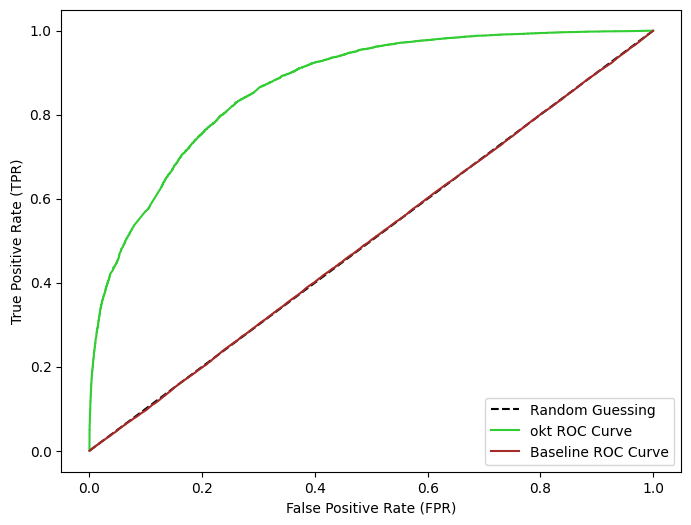

okt ROC-AUC Score : 0.8693
Baseline ROC-AUC Score : 0.5001


In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
colors = ['limegreen', 'violet', 'dodgerblue', 'brown']
fpr, tpr, thresholds = roc_curve(token_okt_lr[1], token_okt_lr[2])
plt.plot(fpr, tpr, color='limegreen', label=f"{token_okt_lr[0]} ROC Curve")
LR_test = y_test
LR_probs = LR.predict_proba(x_test_vector)[:, 1]
fpr, tpr, thresholds = roc_curve(LR_test, LR_probs)
plt.plot(fpr, tpr, color='brown', label="Baseline ROC Curve")
    
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.show()

# AUC 계산
roc_auc = roc_auc_score(token_okt_lr[1], token_okt_lr[2])
print(f"{token_okt_lr[0]} ROC-AUC Score : {roc_auc:.4f}")

roc_auc = roc_auc_score(LR_test, LR_probs)
print(f"Baseline ROC-AUC Score : {roc_auc:.4f}")
